### December 30, 2018 ###

**Single Input Image** <br />
Online Interactive Tutorial with Jupyter <br />
Generate a trimap from an input of mask image

In [2]:
%matplotlib inline
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

**Define The Trimap Function**

In [2]:
def trimap_generate(img, name, size, number):
    """
    This function creates a trimap based on simple dilation algorithm
    Inputs [3]: a binary image (black & white only), name of the image, dilation pixels 
    Output    : a trimap
    """
    pixels    = 2*size + 1;                       # doubled and then plus one to have an odd-sized (centered) kernel            
    kernel    = np.ones((pixels,pixels),np.uint8) # pixel extensions = size
    dilation  = cv2.dilate(img, kernel, iterations = 1) 

    dilation  = np.where(dilation == 255, 127, dilation) 	## WHT to GRY
    remake    = np.where(dilation != 127, 0, dilation)		## Smoothing
    remake    = np.where(img > 127, 200, dilation)			## mark the tumor inside light GRY

    remake    = np.where(remake < 127, 0, remake)			## Embelishment
    remake    = np.where(remake > 200, 0, remake)			## Embelishment
    remake    = np.where(remake == 200, 255, remake)		## light GRY to WHT

    path = "./images/results/"
    new_name = '{}px_'.format(size) + name + '_{}.png'.format(number);
    cv2.imwrite(os.path.join(path , new_name) , remake)

**Load The Binary Image**

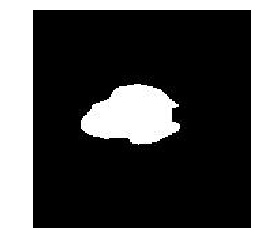

In [97]:
name  = "./images/practices/binary_0.png";
title = "trimap"
size  = 10; # dilation size
number= name[-5]; # obtain the number

img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray');
plt.axis('off');

height, width = img.shape[:2]

## Generate Trimap ##
trimap_generate(img, title, size, number)

**Check The Trimap Result**

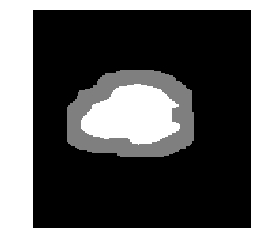

In [99]:
name  = "./images/results/10px_trimap_0.png";
result = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
plt.imshow(result,cmap='gray');
plt.axis('off');

### January 06, 2018 ###
In case of inexact binary images, erosion argument has been included to further shrink the overestimated foreground.

The default parameter of erosion argument is None; if enabled, the default kernel size is (3x3). I would recommend changing the iteration number (default is 5) inside the cv2.erode() sub-routine, instead of changing the kernel size.

In my case, all binary images were generated from **U-Net** with a Jaccard's Index of 94% with respect to physician's ground truth images. Therefore, I am pretty confident that the mask image does reflect the accurate foreground.

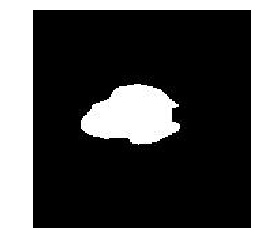

In [21]:
name  = "./images/practices/binary_0.png";
title = "trimap"
size  = 10; # dilation size
number= name[-5]; # obtain the number

img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray');
plt.axis('off');

In [22]:
# This sub-routine allows foreground erosion
def trimap_generate(img, name, size, number, erosion=False):
    """
    This function creates a trimap based on simple dilation algorithm
    Inputs [4]: a binary image (black & white only), name of the image, dilation pixels 
                the last argument is optional; i.e., how many iterations will the image get eroded
    Output    : a trimap
    """
    pixels    = 2*size + 1;                                ## doubled and then plus one to have an odd-sized (centered) kernel            
    kernel    = np.ones((pixels,pixels),np.uint8)          ## pixel extensions = size
    
    if erosion is not False:
        erosion = int(erosion)
        erosion_kernel = np.ones((3,3), np.uint8)                ## Design an odd-sized erosion kernel
        img = cv2.erode(img, erosion_kernel, iterations=erosion) ## How many erosion do you expect
        img = np.where( img > 0, 255, img )                      ## Any gray-colored pixel becomes white (smoothing)
    
    dilation  = cv2.dilate(img, kernel, iterations = 1) 

    dilation  = np.where(dilation == 255, 127, dilation)    ## WHT to GRY
    remake    = np.where(dilation != 127, 0, dilation)      ## Smoothing
    remake    = np.where(img > 127, 200, dilation)          ## Mark the tumor inside light GRY

    remake    = np.where(remake < 127, 0, remake)           ## Embelishment
    remake    = np.where(remake > 200, 0, remake)           ## Embelishment
    remake    = np.where(remake == 200, 255, remake)        ## Light GRY to WHT
    
    # remake    = img
    path = "./images/results/"
    new_name = '{}px_'.format(size) + name + '_{}.png'.format(number);
    cv2.imwrite(os.path.join(path , new_name) , remake)

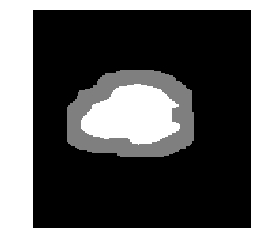

In [23]:
trimap_generate(img, title, size, number, erosion = False)

name  = "./images/results/10px_trimap_0.png";
result = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
plt.imshow(result,cmap='gray');
plt.axis('off');